In [2]:
%matplotlib inline
import math
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

The main detection and data taking method in my lab is the absorption imaging of an atomic cloud. An absorption image consist of three frames. The first frame is the image of the shadow of atomic cloud. The next image is the illumination of the same ccd without any atom cloud. This one provides us the profile of our imaging beam and is used for normalization. The last image is a dark image where we measure pixel counts in the ccd when there is no laser light.
The optical density is calculated as

-ln [ (Atom - Dark)/(Background - Dark) ] 

Optical density images usually have fringe noise patterns repeated most of the shots. We can eliminate them via calculating an eigenbasis using PCA, and subtracting the portion represented by the projection onto the dimentions found by PCA

# PCA on background shots

In [3]:
# Create a StandardScaler
mi_standardscaler = StandardScaler()

In [11]:
ImageArray=[]
# Read the set of images for calculating principle components
for mi_image in os.listdir("C:/Users/BEC2/Desktop/Python/BackgroundShots/Train"):
    ##print(mi_image)
    tifIm = Image.open("C:/Users/BEC2/Desktop/Python/BackgroundShots/Train/"+mi_image)
    ##plt.imshow(tifIm)
    ##print(plt.imshow(tifIm,cmap='gray'))
    ##print(np.asarray(tifIm).shape)
    # Turn the 2d image data into a vector
    ImageArray.append(np.reshape(np.asarray(tifIm),-1))
    tifIm.close

In [5]:
len(ImageArray)

9

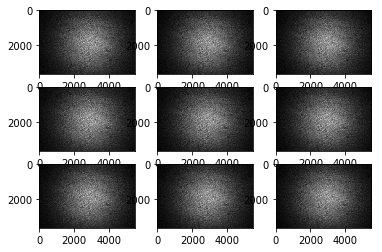

In [36]:
# the set of Images we use for PCA analysis
fig, axes = plt.subplots(3,3)
for i in range(0,3):
    for j in range(0,3):
        axes[i,j].imshow(np.asarray(ImageArray[3*i+j]).reshape(3672,5496),cmap='gray')

In [38]:
# tune the scaler using set of images
mi_standardscaler.fit(ImageArray)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
# PCA
n_components = 9
myPCA = PCA(n_components).fit(mi_standardscaler.transform(ImageArray))
eigenimages = myPCA.components_.reshape(n_components,3672,5496)

# All the variance in the set is explained by our 9 principal components
print(myPCA.explained_variance_ratio_)
print(sum(myPCA.explained_variance_ratio_))
print(myPCA.singular_values_)

[2.00637010e-01 1.55942719e-01 1.31946471e-01 1.15982294e-01
 1.05110716e-01 1.02542727e-01 9.49777379e-02 9.28603249e-02
 6.97629445e-28]
0.9999999999999998
[6.03672617e+03 5.32204454e+03 4.89547507e+03 4.58977927e+03
 4.36937631e+03 4.31567154e+03 4.15342970e+03 4.10687091e+03
 3.55965866e-10]


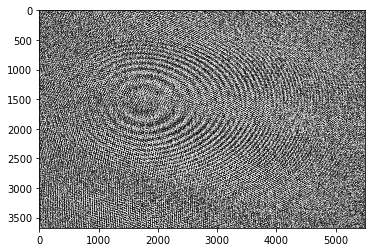

In [7]:
# Eigenimage0
plt.imshow(eigenimages[0,:,:],cmap='gray')

In [9]:
for mi_image in os.listdir("C:/Users/BEC2/Desktop/Python/BackgroundShots/Test"):
    #print(mi_image)
    tifIm = Image.open("C:/Users/BEC2/Desktop/Python/BackgroundShots/Test/"+mi_image)
    #plt.imshow(tifIm)
    #print(plt.imshow(tifIm,cmap='gray'))
    #print(np.asarray(tifIm).shape)
    test_data = np.reshape(np.asarray(tifIm),-1)
    tifIm.close
print(len(test_data))

20181312


In [12]:
# Scale the test image using same scaling
scaled_test_data=mi_standardscaler.transform([test_data])

In [18]:
# Apply dimentionality reduction on the test image
dim_red_data = mi_standardscaler.inverse_transform(myPCA.inverse_transform(myPCA.transform(scaled_test_data))).reshape(3672,5496)

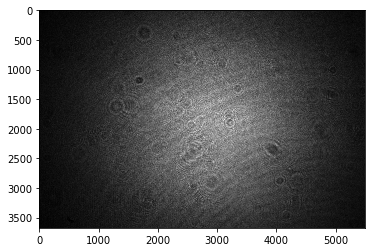

In [17]:
#Original Test image
plt.imshow(test_data.reshape(3672,5496),cmap='gray')

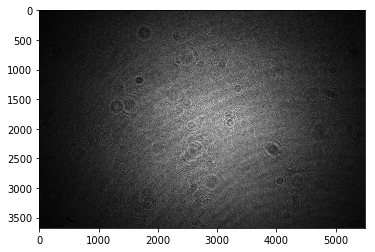

In [19]:
#Inverse transformed test image after dimentionality reduction
plt.imshow(dim_red_data,cmap='gray')

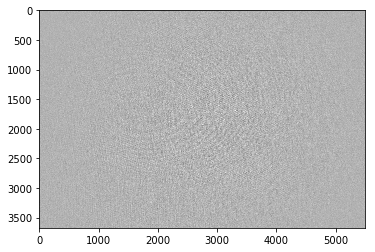

In [23]:
# Difference of the original test image and inverse transformed dimentionality reducted test image. 
# Most of the noise due to inhomogeneous beam profile is gone
plt.imshow(test_data.reshape(3672,5496)-dim_red_data,cmap='gray')
# But achieve this cancellation in lab everyday just by dividing two images. We have to the cancellation in 
# our divided images i.e in absorption images.

# PCA on absorption images

In [37]:
# Use absorption images directly
ImageArray=[]
for mi_image in os.listdir("C:/Users/BEC2/Desktop/Python/Test_Shots/Train"):
    #print(mi_image)
    tifIm = Image.open("C:/Users/BEC2/Desktop/Python/Test_Shots/Train/"+mi_image)
    #plt.imshow(tifIm)
    #print(plt.imshow(tifIm,cmap='gray'))
    #print(np.asarray(tifIm).shape)
    ImageArray.append(np.reshape(np.asarray(tifIm),-1))
    tifIm.close

In [38]:
new_scaler = StandardScaler()

In [39]:
new_scaler.fit(ImageArray)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
n_components = 8
myPCA = PCA(n_components).fit(new_scaler.transform(ImageArray))
eigenimages = myPCA.components_.reshape(n_components,1224,1832)

print(myPCA.explained_variance_ratio_)
print(myPCA.singular_values_)

[3.47930817e-01 1.91659372e-01 1.66808939e-01 9.24044871e-02
 7.29268429e-02 6.63667874e-02 6.19027556e-02 2.52769103e-29]
[2.49830171e+03 1.85422942e+03 1.72984861e+03 1.28749327e+03
 1.14377907e+03 1.09112331e+03 1.05378844e+03 2.12941560e-11]


In [42]:
for mi_image in os.listdir("C:/Users/BEC2/Desktop/Python/Test_Shots/Test"):
    #print(mi_image)
    tifIm = Image.open("C:/Users/BEC2/Desktop/Python/Test_Shots/Test/"+mi_image)
    #plt.imshow(tifIm)
    #print(plt.imshow(tifIm,cmap='gray'))
    #print(np.asarray(tifIm).shape)
    test_data = np.reshape(np.asarray(tifIm),-1)
    tifIm.close
print(len(test_data))
scaled_test_data=new_scaler.transform([test_data])

2242368


In [44]:
dim_red_data = mi_standardscaler.inverse_transform(myPCA.inverse_transform(myPCA.transform(scaled_test_data))).reshape(1224,1832)

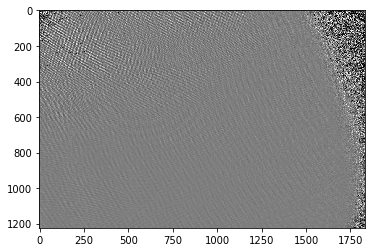

In [45]:
#Example test absorption image
plt.imshow(test_data.reshape(1224,1832),cmap='gray')

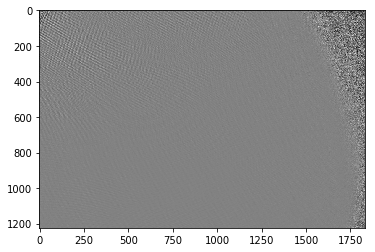

In [46]:
# Inverse transformed test image after applying dimentionality reduction
plt.imshow(dim_red_data,cmap='gray')

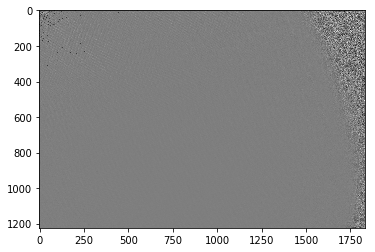

In [47]:
# Difference of the two, the fringe has gone! This is exactly what we need.
plt.imshow(test_data.reshape(1224,1832)-dim_red_data,cmap='gray')

In [45]:
eigenimages[0,:,:]

array([[-7.10348443e-05,  4.61511703e-06, -2.43049876e-04, ...,
         1.02219301e-05, -2.88001643e-04, -4.36342467e-05],
       [-7.10348443e-05,  4.61511703e-06, -9.78066176e-05, ...,
        -2.62097646e-04, -2.55948311e-04, -2.11212422e-04],
       [ 1.87824882e-04,  1.93119233e-04,  8.73770218e-05, ...,
         1.49989259e-04,  4.95663822e-05, -2.10553742e-04],
       ...,
       [ 1.13435661e-04, -1.64330072e-05,  7.72725399e-05, ...,
        -1.96115224e-04, -1.65938874e-04, -6.66225586e-05],
       [-1.29281213e-04, -5.79679743e-05,  7.25466571e-05, ...,
        -3.02728587e-04, -2.51795877e-04, -3.92135624e-04],
       [-1.42648729e-04, -1.28963017e-05, -1.43859305e-04, ...,
        -1.22890183e-04, -2.51795877e-04, -3.92135624e-04]])

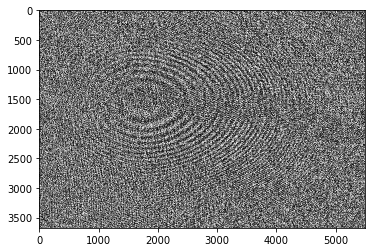

In [52]:
plt.imshow(eigenimages[1,:,:],cmap='gray')

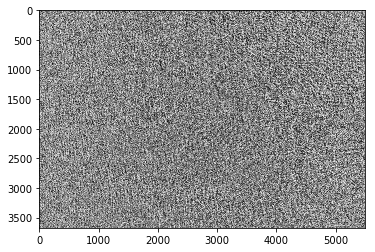

In [51]:
plt.imshow(eigenimages[2,:,:],cmap='gray')

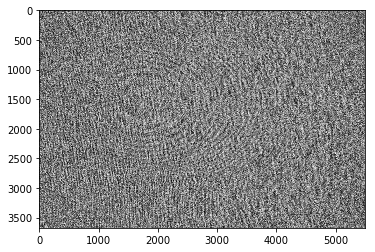

In [50]:
plt.imshow(eigenimages[3,:,:],cmap='gray')

AxesImage(54,36;334.8x217.44)


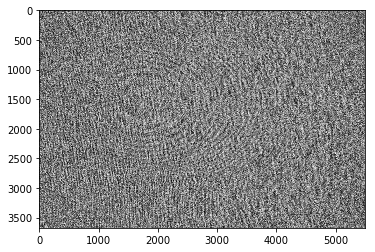

In [53]:
print(plt.imshow(eigenimages[3,:,:],cmap='gray'))

# Code Pieces to recycle later

### Construct the n x m matrix for SVD

In [2]:
FeatureMatrix = []
for filename in glob.glob('*.TIF'):
    tifIm = Image.open(filename)
    ImageArray = []
    try: 
        for i in xrange(3):
            #there are two options here: np.array() or np.asarray(). The former makes a copy of the object but the latter does not.
            CurrentFrame = np.asarray(tifIm)
            if np.ndim(CurrentFrame) == 3:
                #Why do we do this???
                CurrentFrame = CurrentFrame[:,:,0] + 256*CurrentFrame[:,:,1] + 65536*CurrentFrame[:,:,2]
            ImageArray.append(CurrentFrame)
            tifIm.seek(i+1)
    except EOFError:
        pass
    tifIm.close()
    im = np.array(ImageArray)
    #Generate the absorption image
    wAtom = (im[0,:,:]-im[2,:,:])
    Laser = (im[1,:,:]-im[2,:,:])
    wAtom[wAtom <= 0] = 1
    Laser[Laser <= 0] = 1 
    Abs = -np.log(wAtom)+np.log(Laser)
    
    row_array=np.reshape(Abs,-1)
    FeatureMatrix.append(row_array)
print(np.array(FeatureMatrix).shape)

(0,)


### PCA with saturated images

In [21]:
from sklearn.decomposition import PCA
n_components = 3
myPCA = PCA(n_components).fit(FeatureMatrix)
eigenimages = myPCA.components_.reshape(n_components,1024,1392)

In [22]:
eigenimages.shape

(3, 1024, 1392)

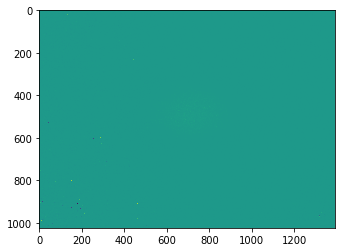

In [23]:
plt.imshow(eigenimages[0,:,:])

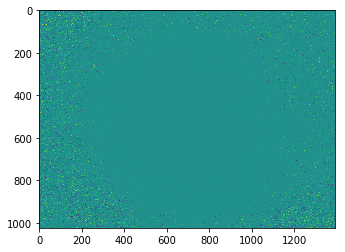

In [120]:
plt.imshow(eigenimages[1,:,:])

### PCA with images of an atom cloud

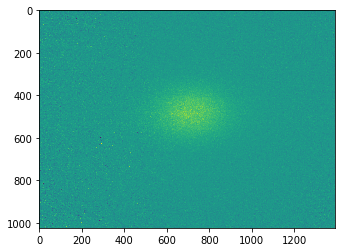

In [26]:
for filename in glob.glob('*.TIF'):
    tifIm = Image.open(filename)
    ImageArray = []
    try: 
        for i in xrange(3):
            #there are two options here: np.array() or np.asarray(). The former makes a copy of the object but the latter does not.
            if tifIm.mode == 'I':
                CurrentFrame = np.asarray(tifIm, dtype=np.int16)
            else:
                CurrentFrame = np.asarray(tifIm, dtype=np.float32)
            #CurrentFrame = np.asarray(tifIm)
            if np.ndim(CurrentFrame) == 3:
                #Why do we do this???
                CurrentFrame = CurrentFrame[:,:,0] + 256*CurrentFrame[:,:,1] + 65536*CurrentFrame[:,:,2]
            ImageArray.append(CurrentFrame)
            tifIm.seek(i+1)
    except EOFError:
        pass
    tifIm.close()
    im = np.array(ImageArray)
    #Generate the absorption image
    wAtom = (im[0,:,:]-im[2,:,:])
    Laser = (im[1,:,:]-im[2,:,:])
    wAtom[wAtom <= 0] = 1
    Laser[Laser <= 0] = 1 
    Abs = -np.log(wAtom)+np.log(Laser)
    plt.imshow(Abs)

In [35]:
from sklearn.decomposition import PCA
FeatureMatrix = []
for filename in glob.glob('*.TIF'):
    tifIm = Image.open(filename)
    ImageArray = []
    try: 
        for i in xrange(3):
            #there are two options here: np.array() or np.asarray(). The former makes a copy of the object but the latter does not.
            if tifIm.mode == 'I':
                CurrentFrame = np.asarray(tifIm, dtype=np.int16)
            else:
                CurrentFrame = np.asarray(tifIm, dtype=np.float32)
            if np.ndim(CurrentFrame) == 3:
                #Why do we do this???
                CurrentFrame = CurrentFrame[:,:,0] + 256*CurrentFrame[:,:,1] + 65536*CurrentFrame[:,:,2]
            ImageArray.append(CurrentFrame)
            tifIm.seek(i+1)
    except EOFError:
        pass
    tifIm.close()
    im = np.array(ImageArray)
    #Generate the absorption image
    wAtom = (im[0,:,:]-im[2,:,:])
    Laser = (im[1,:,:]-im[2,:,:])
    wAtom[wAtom <= 0] = 1
    Laser[Laser <= 0] = 1 
    Abs = -np.log(wAtom)+np.log(Laser)
    #plt.imshow(Abs)
    row_array=np.reshape(Abs,-1)
    FeatureMatrix.append(row_array)


n_components = 7
myPCA = PCA(n_components,svd_solver='randomized').fit(FeatureMatrix)
eigenimages = myPCA.components_.reshape(n_components,1024,1392)
print(myPCA.explained_variance_ratio_)

[  2.64453636e-01   1.70360453e-01   1.59455465e-01   1.47525219e-01
   1.36061354e-01   1.22143873e-01   1.05415630e-35]


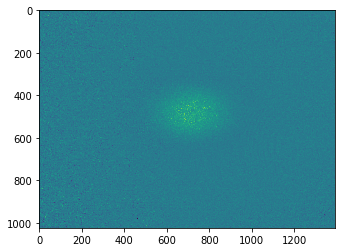

In [31]:
plt.imshow(eigenimages[0,:,:])

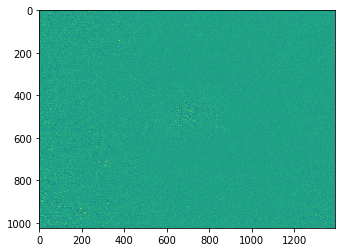

In [29]:
plt.imshow(eigenimages[1,:,:])

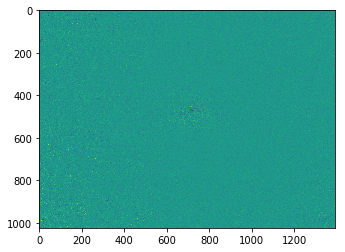

In [32]:
plt.imshow(eigenimages[2,:,:])

### Fun with Image I/O

(1024, 1392, 3)


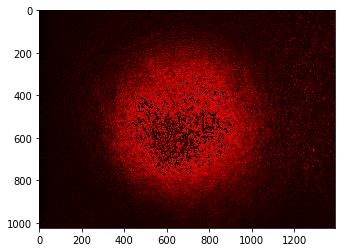

In [66]:
imarray = np.array(im)
im.close()
print(imarray.shape)
plt.imshow(imarray)

(4276224, 4276224)


[0, 4276224, 0, 255]

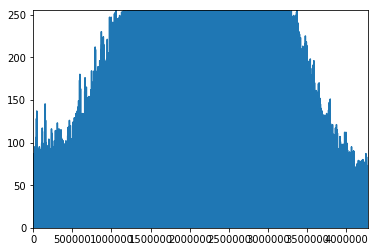

In [30]:
row_array=np.reshape(imarray,-1)
print((len(row_array),1024*1392*3))
plt.plot(row_array)
plt.axis([0, len(row_array), 0, np.max(row_array)])

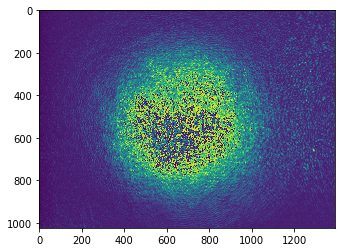

In [52]:
plt.imshow(imarray[:,:,0])

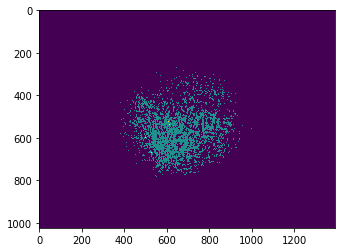

In [53]:
plt.imshow(imarray[:,:,1])

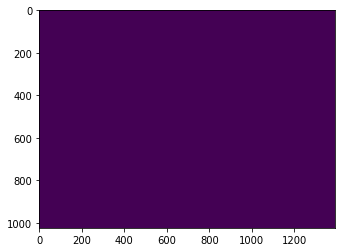

In [56]:
plt.imshow(imarray[:,:,2])

### Fun with glob
- finds pathnames

In [87]:
for filename in glob.glob('*.TIF'):
    print(filename)

9.TIF
8.TIF
3.TIF
2.TIF
1.TIF
5.TIF
4.TIF
6.TIF


### Reading a 3-frame TIF image properly

In [89]:
#I have to be more fancy while reading images
    # we open the file
tifIm = Image.open('1.tif')
ImageArray = []
try: 
    for i in xrange(3):
        #there are two options here: np.array() or np.asarray(). The former makes a copy of the object but the latter does not.
        CurrentFrame = np.asarray(tifIm)
        if np.ndim(CurrentFrame) == 3:
            #Why do we do this???
            CurrentFrame = CurrentFrame[:,:,0] + 256*CurrentFrame[:,:,1] + 65536*CurrentFrame[:,:,2]
        ImageArray.append(CurrentFrame)
        tifIm.seek(i+1)
except EOFError:
    pass
tifIm.close()
im = np.array(ImageArray)
print(im.shape)

(3, 1024, 1392)


### Generating the absorption image

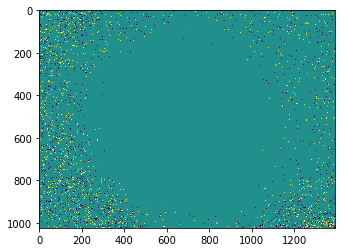

In [90]:
wAtom = (im[0,:,:]-im[2,:,:])
Laser = (im[1,:,:]-im[2,:,:])
wAtom[wAtom <= 0] = 1
Laser[Laser <= 0] = 1 
Abs = wAtom / Laser
plt.imshow(-np.log(wAtom)+np.log(Laser))